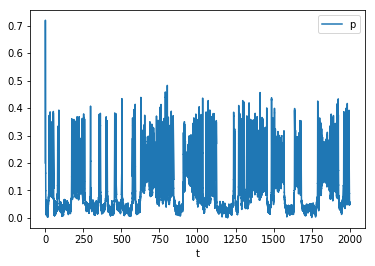

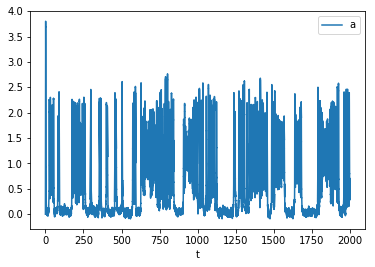

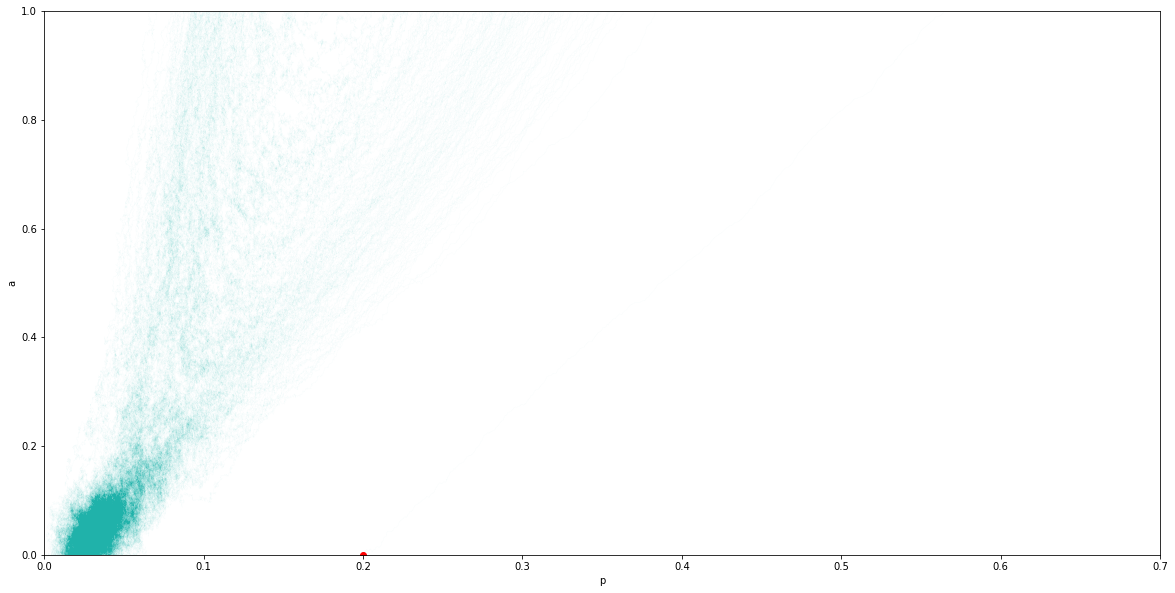

In [13]:
import sys, random             
import scipy, pylab     
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


def RA_f(p_i, a_i, alph1, alph2, alph3, alph4, gam, dt, lamb1, lamb2):
    """
    Compute the change in coordinates given the current position,
    the parameters which govern the stochastic Hopf dynamics and the 
    Euler integration timestep.
    """
    # RA
    
    #alph1 = 0.025
    #alph2 = 5, 8, 17
    #alph3 = 0.5
    #alph4 = 0.3.5
    #gam = 1.25
    #lamb1 = 0.1
    #lamb2 = 0.001
    
    #dp = (-gam*p+1/(1+a**2)*(alph1+alph2*(p**2/(1+p**2)))) * dt
    #da = (-a+alph4*p**2/(alph3**2+p**2)) * dt

    if lamb1 != 0.0:
        sigma1 = sqrt(dt)
        da_s= lamb1 * gauss(mu = 0.0, sigma = sigma1) # da_s = dW1(t)
    else: 
        da_s=0

    

    if lamb2 != 0.0:
        sigma2 = sqrt(dt)
        dp_s= lamb2 * gauss(mu = 0.0, sigma = sigma2) # dp_s = dW2(t)
    else:
        dp_s=0   
    

    dp = (-gam*p_i+1/(1+a_i**2)*(alph1+alph2*(p_i**2/(1+p_i**2)))) * dt+dp_s
   
    da = (-a_i+alph4*p_i**2/(alph3**2+p_i**2)) * dt+da_s

    return dp, da


# pull functions out of libraries for our later convenience
gauss = random.gauss
sqrt = scipy.sqrt

# parameters

dt = 0.001
Nt = 2000000
#wp=np.sqrt(1-nu**2)
wp=np.sqrt(1)

tf=Nt*dt
t = np.arange(0, tf, dt)

p_init= 0.2 #0.3 #1
a_init=0 #2.5

alph1 = 0.025
alph2 = 15 #5, 8, 17
alph3 = 0.5
alph4 = 9
gam = 1.25
lamb1 = 0.05 #0.01 #0.01
lamb2 = 0.01  #0.01 #0.01



# initialize the arrays of coordinate values
p = scipy.zeros(Nt)
a = scipy.zeros(Nt)
p[0] = p_init
a[0] = a_init



# MAIN LOOP
num_sims = 1 ### display # of runs
        
for time_step_sim in range(num_sims):        
    for time_step in range(1, Nt):
        p_i = p[time_step - 1]
        a_i = a[time_step -1]
        dp, da = RA_f(p_i, a_i, alph1, alph2, alph3, alph4, gam, dt, lamb1, lamb2)
        p[time_step] = p_i + dp
        a[time_step] = a_i + da
        

    
        
    plt.figure()
    #plt.xlim(100, 200)
    plt.plot(t, p)#, 'blueviolet')
    plt.xlabel('t')
    plt.legend('p')

    plt.figure()
    #plt.xlim(100, 200)
    plt.plot(t, a)#, 'lime')
    plt.xlabel('t')
    plt.legend('a')

    plt.figure(3, figsize = (20,10))
    #plt.xlim(0.6356, 0.63568)
    #plt.ylim(-0.01, 0.01)
    plt.xlim(0, .7) # lamda2 = 0.01
    plt.ylim(0, 1)
    plt.plot(p, a, lw = '.01', color = 'lightseagreen')
    plt.plot(p_init, a_init, 'ro')
    plt.xlabel('p')
    plt.ylabel('a')

plt.show()

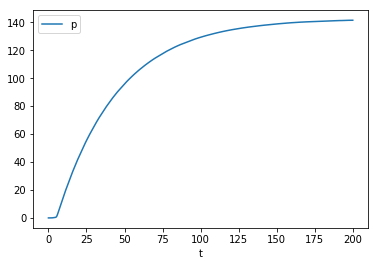

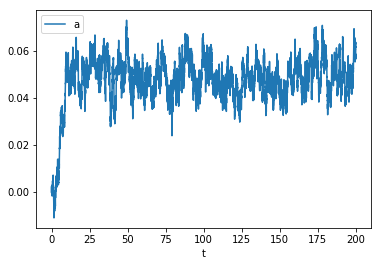

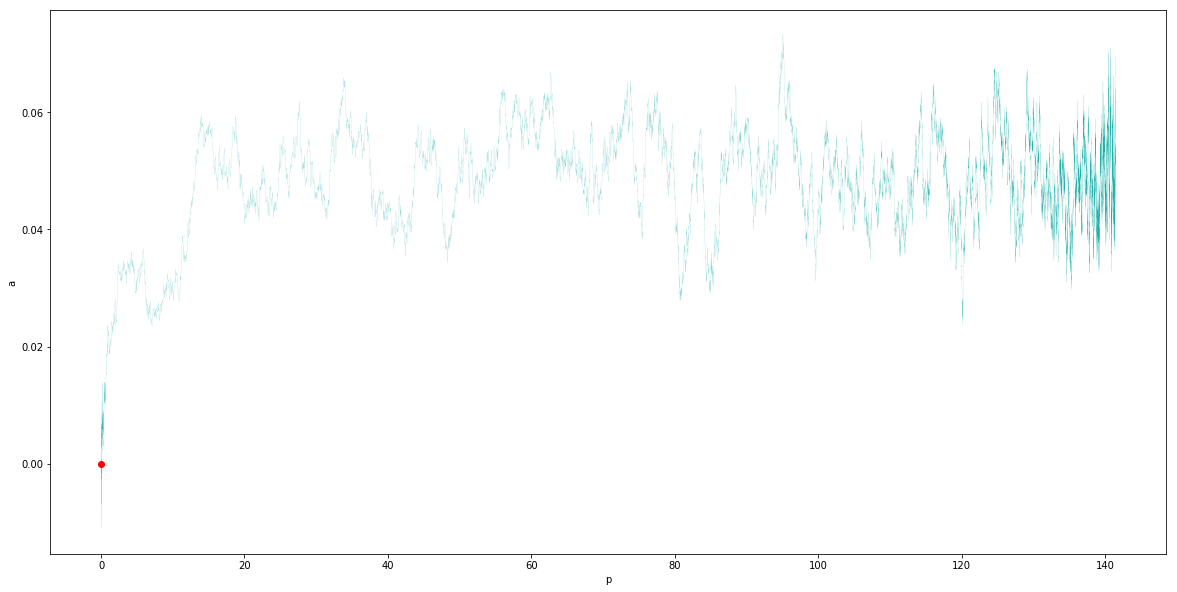

In [48]:
import sys, random             
import scipy, pylab     
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


def RA_f(p_i, a_i, alph1, alph2, alph3, alph4, gam, dt, lamb1, lamb2):
    """
    Compute the change in coordinates given the current position,
    the parameters which govern the stochastic Hopf dynamics and the 
    Euler integration timestep.
    """
    # RA
    
    #alph1 = 0.025
    #alph2 = 5, 8, 17
    #alph3 = 0.5
    #alph4 = 0.3.5
    #gam = 1.25
    #lamb1 = 0.1
    #lamb2 = 0.001
    
    #dp = (-gam*p+1/(1+a**2)*(alph1+alph2*(p**2/(1+p**2)))) * dt
    #da = (-a+alph4*p**2/(alph3**2+p**2)) * dt

    if lamb1 != 0.0:
        sigma1 = sqrt(dt)
        da_s= lamb1 * gauss(mu = 0.0, sigma = sigma1) # da_s = dW1(t)
    else: 
        da_s=0

    

    if lamb2 != 0.0:
        sigma2 = sqrt(dt)
        dp_s= lamb2 * gauss(mu = 0.0, sigma = sigma2) # dp_s = dW2(t)
    else:
        dp_s=0   
    

    dp = (-gam*p_i + (1/(1+a_i**2))*(alph1+alph2*(p_i**2/(1+p_i**2)))) * dt+dp_s
   
    da = (-a_i + (alph4*p_i**2)/(alph3**2+p_i**2)) * dt+da_s

    return dp, da


# pull functions out of libraries for our later convenience
gauss = random.gauss
sqrt = scipy.sqrt

# parameters

dt = 0.01
Nt = 20000
#wp=np.sqrt(1-nu**2)
wp=np.sqrt(1)

tf=Nt*dt
t = np.arange(0, tf, dt)

p_init= 0 #0.3 #1
a_init= 0 #2.5

alph1 = 0.025
alph2 = 3.55 #5, 8, 17
alph3 = .5
alph4 = 0.05
gam = 0.025
lamb1 = 0.01 #0.01 #0.01
lamb2 = 0.01  #0.01 #0.01



# initialize the arrays of coordinate values
p = scipy.zeros(Nt)
a = scipy.zeros(Nt)
p[0] = p_init
a[0] = a_init



# MAIN LOOP
num_sims = 1 ### display # of runs
        
for time_step_sim in range(num_sims):        
    for time_step in range(1, Nt):
        p_i = p[time_step - 1]
        a_i = a[time_step -1]
        dp, da = RA_f(p_i, a_i, alph1, alph2, alph3, alph4, gam, dt, lamb1, lamb2)
        p[time_step] = p_i + dp
        a[time_step] = a_i + da
        

    
        
    plt.figure()
    #plt.xlim(100, 200)
    plt.plot(t, p)#, 'blueviolet')
    plt.xlabel('t')
    plt.legend('p')

    plt.figure()
    #plt.xlim(100, 200)
    plt.plot(t, a)#, 'lime')
    plt.xlabel('t')
    plt.legend('a')

    plt.figure(3, figsize = (20,10))
    #plt.xlim(0.6356, 0.63568)
    #plt.ylim(-0.01, 0.01)
    #plt.xlim(0, .7) # lamda2 = 0.01
    #plt.ylim(0, 1)
    plt.plot(p, a, lw = '.1', color = 'lightseagreen')
    plt.plot(p_init, a_init, 'ro')
    plt.xlabel('p')
    plt.ylabel('a')

plt.show()

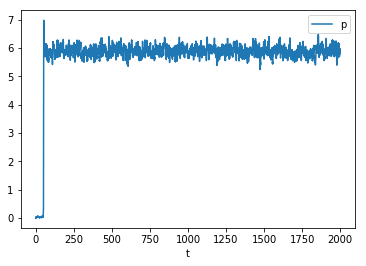

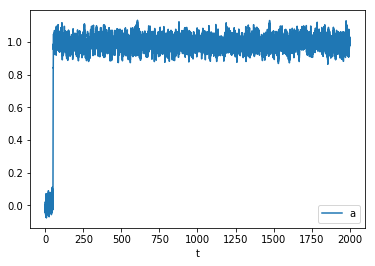

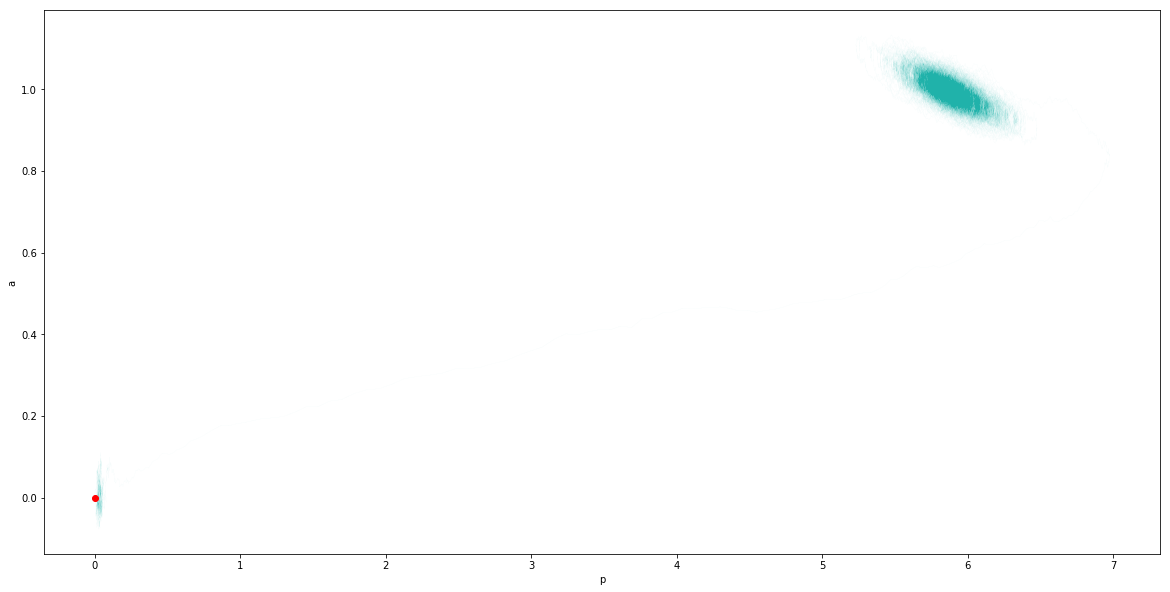

In [23]:
import sys, random             
import scipy, pylab     
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


def RA_f(p_i, a_i, alph1, alph2, alph3, alph4, gam, dt, lamb1, lamb2):
    """
    Compute the change in coordinates given the current position,
    the parameters which govern the stochastic Hopf dynamics and the 
    Euler integration timestep.
    """
    # RA
    
    #alph1 = 0.025
    #alph2 = 5, 8, 17
    #alph3 = 0.5
    #alph4 = 0.3.5
    #gam = 1.25
    #lamb1 = 0.1
    #lamb2 = 0.001
    
    #dp = (-gam*p+1/(1+a**2)*(alph1+alph2*(p**2/(1+p**2)))) * dt
    #da = (-a+alph4*p**2/(alph3**2+p**2)) * dt

    if lamb1 != 0.0:
        sigma1 = sqrt(dt)
        da_s= lamb1 * gauss(mu = 0.0, sigma = sigma1) # da_s = dW1(t)
    else: 
        da_s=0

    

    if lamb2 != 0.0:
        sigma2 = sqrt(dt)
        dp_s= lamb2 * gauss(mu = 0.0, sigma = sigma2) # dp_s = dW2(t)
    else:
        dp_s=0   
    

    dp = (-gam*p_i+1/(1+a_i**2)*(alph1+alph2*(p_i**2/(1+p_i**2)))) * dt+dp_s
   
    da = (-a_i+alph4*p_i**2/(alph3**2+p_i**2)) * dt+da_s

    return dp, da


# pull functions out of libraries for our later convenience
gauss = random.gauss
sqrt = scipy.sqrt

# parameters

dt = 0.01
Nt = 200000
#wp=np.sqrt(1-nu**2)
wp=np.sqrt(1)

tf=Nt*dt
t = np.arange(0, tf, dt)

p_init= 0 #0.3 #1
a_init= 0 #2.5

alph1 = 0.025
alph2 = 15 #5, 8, 17
alph3 = 0.5
alph4 = 1
gam = 1.25
lamb1 = 0.05 #0.01 #0.01
lamb2 = 0.01  #0.01 #0.01



# initialize the arrays of coordinate values
p = scipy.zeros(Nt)
a = scipy.zeros(Nt)
p[0] = p_init
a[0] = a_init



# MAIN LOOP
num_sims = 1 ### display # of runs
        
for time_step_sim in range(num_sims):        
    for time_step in range(1, Nt):
        p_i = p[time_step - 1]
        a_i = a[time_step -1]
        dp, da = RA_f(p_i, a_i, alph1, alph2, alph3, alph4, gam, dt, lamb1, lamb2)
        p[time_step] = p_i + dp
        a[time_step] = a_i + da
        

    
        
    plt.figure()
    #plt.xlim(100, 200)
    plt.plot(t, p)#, 'blueviolet')
    plt.xlabel('t')
    plt.legend('p')

    plt.figure()
    #plt.xlim(100, 200)
    plt.plot(t, a)#, 'lime')
    plt.xlabel('t')
    plt.legend('a')

    plt.figure(3, figsize = (20,10))
    #plt.xlim(0.6356, 0.63568)
    #plt.ylim(-0.01, 0.01)
    #plt.xlim(0, .7) # lamda2 = 0.01
    #plt.ylim(0, 1)
    plt.plot(p, a, lw = '.01', color = 'lightseagreen')
    plt.plot(p_init, a_init, 'ro')
    plt.xlabel('p')
    plt.ylabel('a')

plt.show()